# 1. Configuración Inicial y Carga de Datos

In [81]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv(r"C:\Users\janzo\Downloads\archive (1)\students_adaptability_level_online_education.csv")

In [8]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [10]:
data.describe

<bound method NDFrame.describe of      Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type

In [12]:
data.columns


Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [16]:
print("\n📊 Primeras filas del dataset:")
print(data.head())


📊 Primeras filas del dataset:
  Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No 

# 2. Exploración y Limpieza de Datos

In [20]:
print(f"\n📏 Dimensiones del dataset: {data.shape[0]} filas x {data.shape[1]} columnas")


📏 Dimensiones del dataset: 1205 filas x 14 columnas


In [22]:
# Verificar tipos de datos
print("\n🔤 Tipos de datos:")
print(data.dtypes)


🔤 Tipos de datos:
Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object


In [24]:
# Verificar valores nulos
print("\n❓ Valores nulos por columna:")
print(data.isnull().sum())


❓ Valores nulos por columna:
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


In [26]:
# Estadísticas descriptivas para variables numéricas
print("\n📈 Estadísticas descriptivas:")
print(data.describe())


📈 Estadísticas descriptivas:
       Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      663    374             530              823        901      935   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1205                1205          1205         1205   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1004                 878           695          775   

       Class Duration Self Lms  Device Adaptivity Level  
count            1205     1205    1205             1205  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderat

In [28]:
# Para variables categóricas, ver distribución de valores
print("\n📊 Distribución de variables categóricas:")
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(data[col].value_counts(normalize=True).round(3) * 100)


📊 Distribución de variables categóricas:

Gender:
Gender
Boy     55.0
Girl    45.0
Name: proportion, dtype: float64

Age:
Age
21-25    31.0
11-15    29.3
16-20    23.1
1-5       6.7
26-30     5.6
6-10      4.2
Name: proportion, dtype: float64

Education Level:
Education Level
School        44.0
University    37.8
College       18.2
Name: proportion, dtype: float64

Institution Type:
Institution Type
Non Government    68.3
Government        31.7
Name: proportion, dtype: float64

IT Student:
IT Student
No     74.8
Yes    25.2
Name: proportion, dtype: float64

Location:
Location
Yes    77.6
No     22.4
Name: proportion, dtype: float64

Load-shedding:
Load-shedding
Low     83.3
High    16.7
Name: proportion, dtype: float64

Financial Condition:
Financial Condition
Mid     72.9
Poor    20.1
Rich     7.1
Name: proportion, dtype: float64

Internet Type:
Internet Type
Mobile Data    57.7
Wifi           42.3
Name: proportion, dtype: float64

Network Type:
Network Type
4G    64.3
3G    34.1
2G 

In [30]:
# Verificar la distribución de la variable objetivo
print("\n🎯 Distribución de la variable objetivo (Adaptivity Level):")
print(data['Adaptivity Level'].value_counts())


🎯 Distribución de la variable objetivo (Adaptivity Level):
Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64


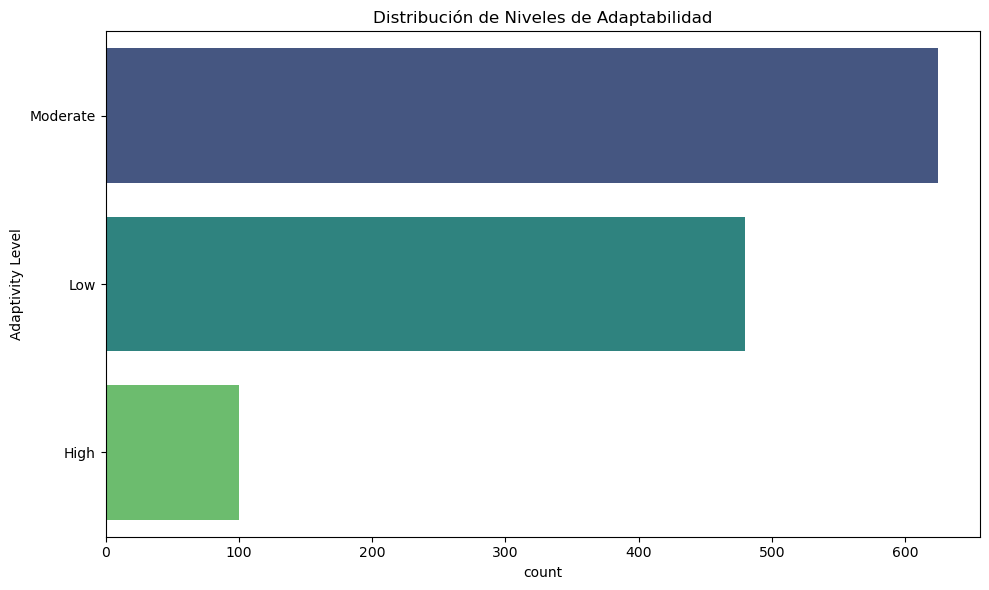

In [32]:
# Visualizar la distribución
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Adaptivity Level'], palette='viridis')
plt.title('Distribución de Niveles de Adaptabilidad')
plt.tight_layout()
plt.show()

In [34]:
# Limpieza de datos (si es necesario)
# Verificamos si hay valores faltantes y decidimos qué hacer con ellos
if data.isnull().sum().sum() > 0:
    print("\n🧹 Realizando limpieza de datos...")
    data = data.dropna()  # Eliminar filas con valores nulos
    print(f"Después de eliminar valores nulos: {data.shape[0]} filas")

# 3. Análisis Exploratorio de Datos (EDA)

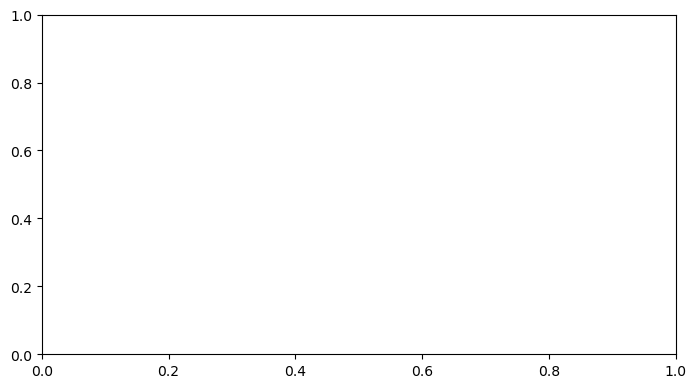

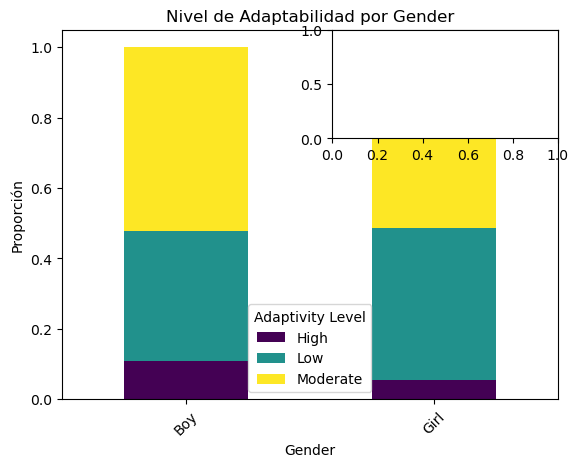

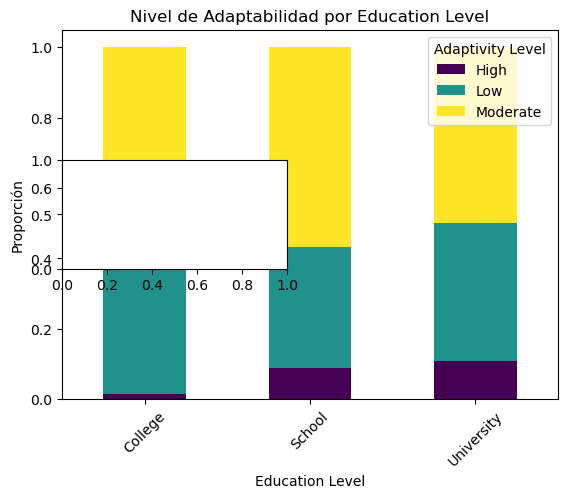

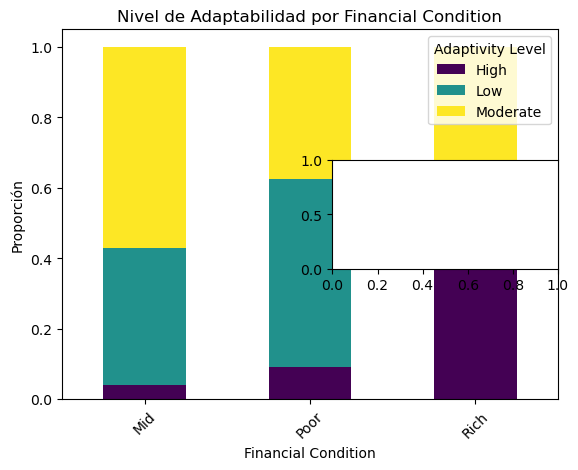

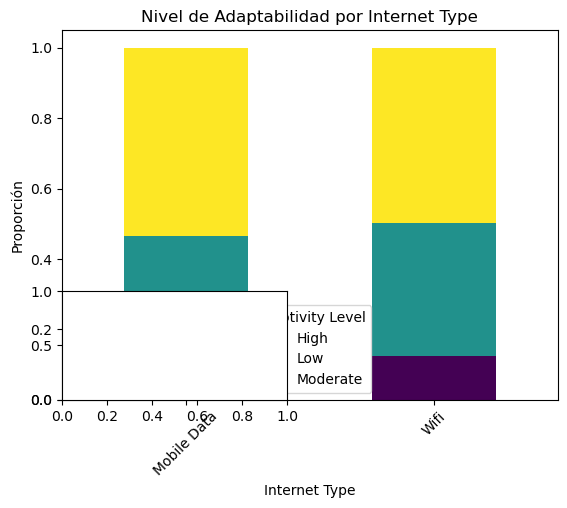

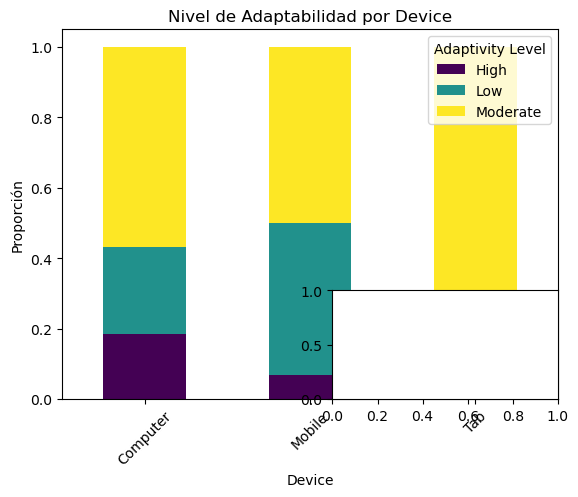

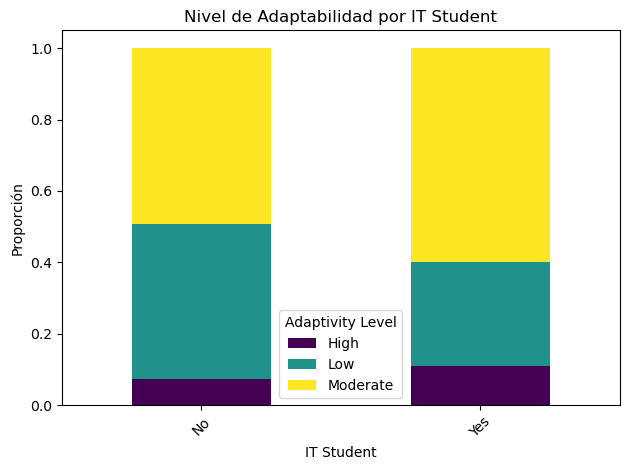

In [41]:
# Seleccionamos algunas variables categóricas clave para visualizar
key_categorical_features = ['Gender', 'Education Level', 'Financial Condition', 
                           'Internet Type', 'Device', 'IT Student']

plt.figure(figsize=(18, 15))
for i, feature in enumerate(key_categorical_features):
    plt.subplot(3, 2, i+1)
    # Crear un crosstab normalizado
    ct = pd.crosstab(data[feature], data['Adaptivity Level'], normalize='index')
    ct.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Nivel de Adaptabilidad por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporción')
    plt.xticks(rotation=45)
    plt.legend(title='Adaptivity Level')

plt.tight_layout()
plt.show()

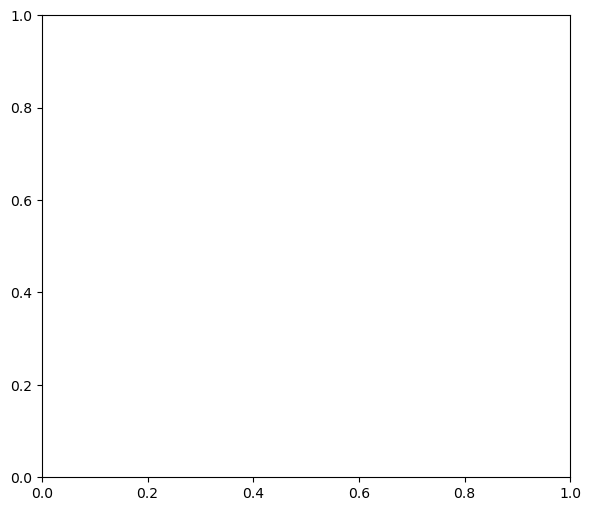

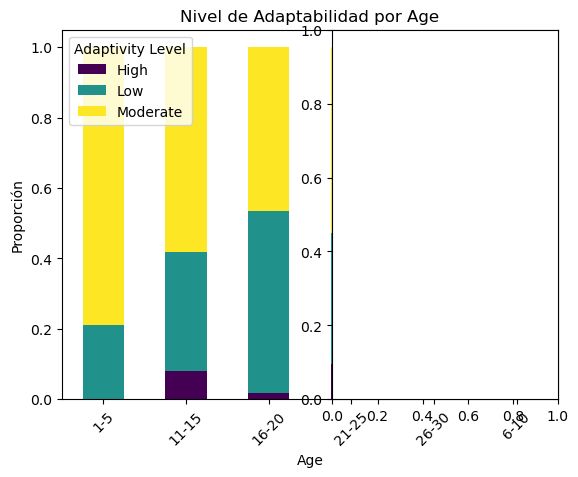

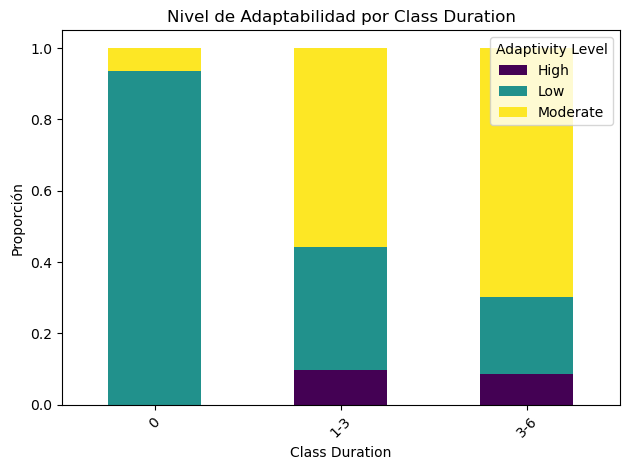

In [43]:
# Para Age y Class Duration, que son ordinales
ordinal_features = ['Age', 'Class Duration']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(ordinal_features):
    plt.subplot(1, 2, i+1)
    ct = pd.crosstab(data[feature], data['Adaptivity Level'], normalize='index')
    ct.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Nivel de Adaptabilidad por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporción')
    plt.xticks(rotation=45)
    plt.legend(title='Adaptivity Level')

plt.tight_layout()
plt.show()


# 4. Preparación de Datos para Modelado

In [46]:
# Definir variable objetivo
y = data['Adaptivity Level']

# Definir variables predictoras (todas las demás columnas)
X = data.drop('Adaptivity Level', axis=1)

# Identificar tipos de variables
# Para este dataset, todas las variables son categóricas
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCaracterísticas categóricas: {categorical_features}")


Características categóricas: ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device']


In [48]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nConjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
print("\nDistribución de clases en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True).round(3) * 100)
print("\nDistribución de clases en conjunto de prueba:")
print(y_test.value_counts(normalize=True).round(3) * 100)



Conjunto de entrenamiento: 964 muestras
Conjunto de prueba: 241 muestras

Distribución de clases en conjunto de entrenamiento:
Adaptivity Level
Moderate    51.9
Low         39.8
High         8.3
Name: proportion, dtype: float64

Distribución de clases en conjunto de prueba:
Adaptivity Level
Moderate    51.9
Low         39.8
High         8.3
Name: proportion, dtype: float64


# 5. Crear Preprocesador para Datos Categóricos

In [51]:
# Todas nuestras variables son categóricas, así que usamos OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 6. Modelo 1: Random Forest

In [54]:
# Crear pipeline con preprocesamiento y modelo
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir parámetros para búsqueda
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Reducimos los parámetros para que el código se ejecute más rápido
# En un caso real, podrías usar más combinaciones

# Búsqueda de mejores hiperparámetros con validación cruzada
grid_search = GridSearchCV(
    rf_pipeline, param_grid, cv=5, 
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Entrenar modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejores parámetros
print("\n✅ Entrenamiento completado")
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Entrenamiento completado
Mejores parámetros encontrados:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}



📊 Informe de clasificación - Random Forest:
              precision    recall  f1-score   support

        High       0.89      0.80      0.84        20
         Low       0.93      0.91      0.92        96
    Moderate       0.91      0.94      0.92       125

    accuracy                           0.91       241
   macro avg       0.91      0.88      0.89       241
weighted avg       0.91      0.91      0.91       241



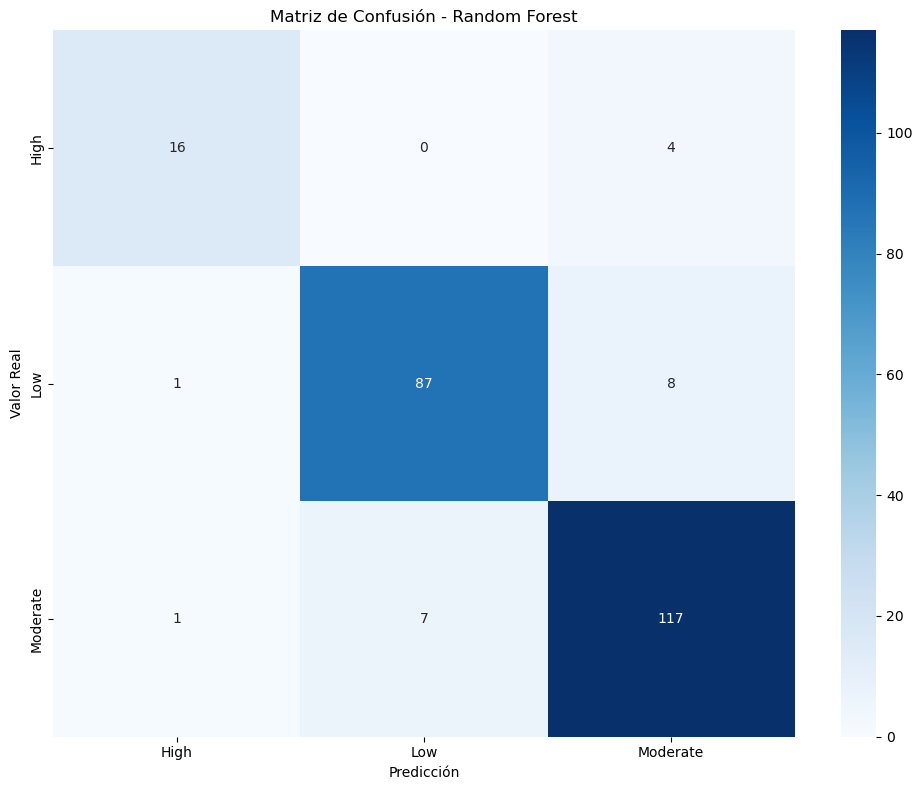

In [58]:
# Evaluar en datos de prueba
rf_best = grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Métricas de evaluación
print("\n📊 Informe de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf)
# Usando seaborn para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=sorted(y.unique()),
           yticklabels=sorted(y.unique()))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()

# 7. Análisis de Importancia de Características

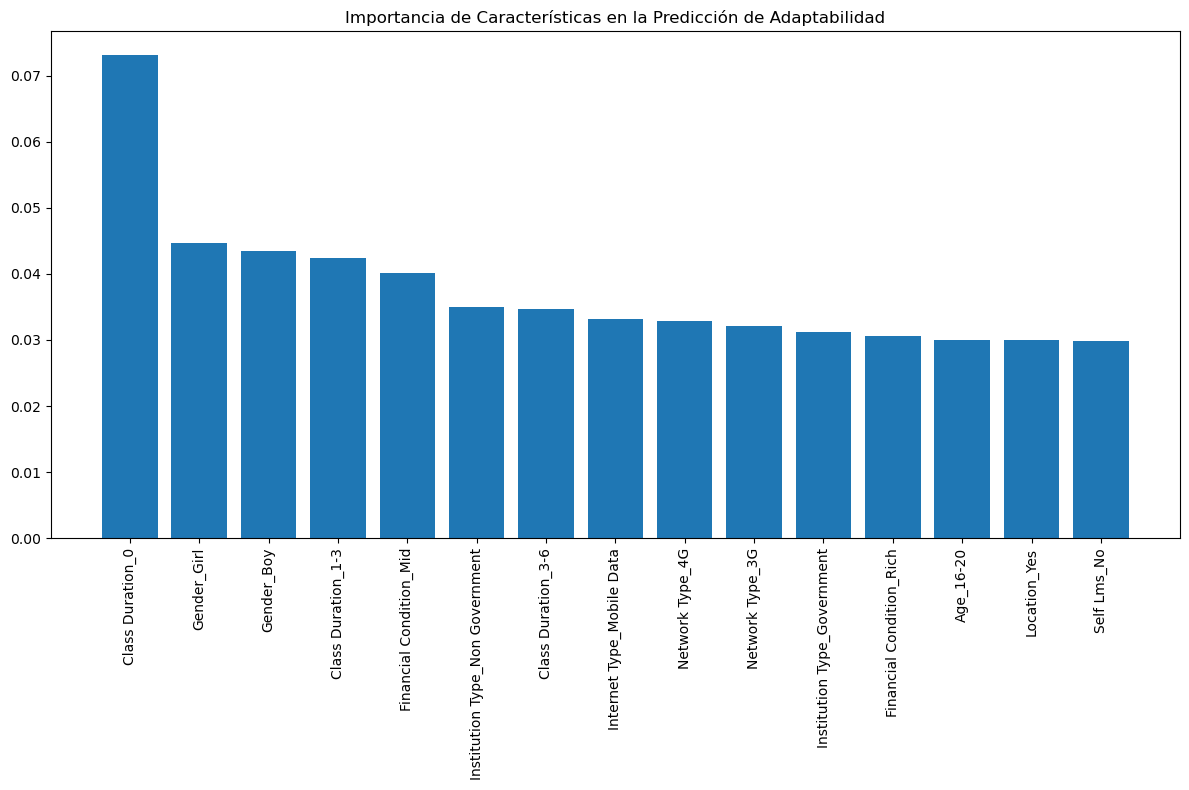


Top 10 características más importantes:
                            Feature  Importance
27                 Class Duration_0    0.073063
1                       Gender_Girl    0.044711
0                        Gender_Boy    0.043531
28               Class Duration_1-3    0.042388
19          Financial Condition_Mid    0.040197
12  Institution Type_Non Government    0.034921
29               Class Duration_3-6    0.034644
22        Internet Type_Mobile Data    0.033245
26                  Network Type_4G    0.032901
25                  Network Type_3G    0.032155


In [65]:
# Acceder al preprocessor entrenado desde el pipeline
fitted_preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

# Acceder directamente al OneHotEncoder desde la columna categórica
ohe = fitted_preprocessor.named_transformers_['cat']

# Obtener nombres de características codificadas
feature_names = ohe.get_feature_names_out(categorical_features).tolist()

# Obtener el modelo ya entrenado
rf_best = grid_search.best_estimator_

# Obtener importancias y ordenarlas
importances = rf_best.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Graficar top 15
plt.figure(figsize=(12, 8))
plt.title('Importancia de Características en la Predicción de Adaptabilidad')
plt.bar(range(min(15, len(feature_names))), 
        importances[indices[:15]], align='center')
plt.xticks(range(min(15, len(feature_names))), 
           [feature_names[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.show()

# Mostrar en tabla las 10 más importantes
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 características más importantes:")
print(feature_importance_df.head(10))


# 8. Modelo 2: Regresión Logística

Fitting 5 folds for each of 6 candidates, totalling 30 fits

✅ Entrenamiento completado
Mejores parámetros encontrados:
{'classifier__C': 10, 'classifier__solver': 'saga'}

📊 Informe de clasificación - Regresión Logística:
              precision    recall  f1-score   support

        High       0.59      0.50      0.54        20
         Low       0.76      0.67      0.71        96
    Moderate       0.73      0.82      0.77       125

    accuracy                           0.73       241
   macro avg       0.69      0.66      0.67       241
weighted avg       0.73      0.73      0.73       241



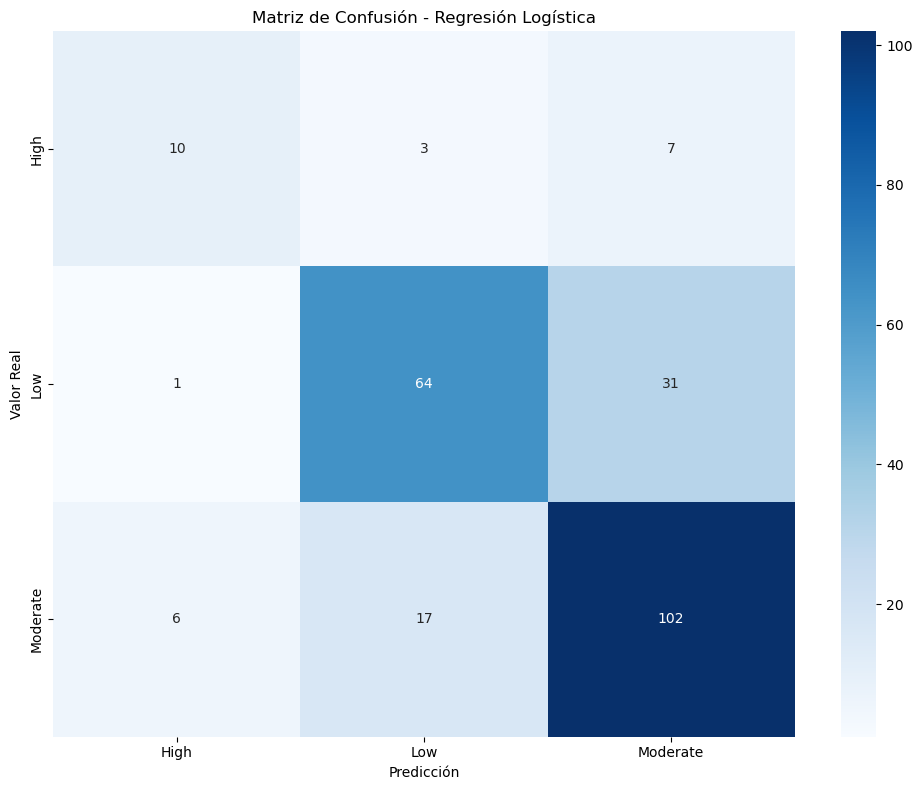

In [70]:
# Crear pipeline con preprocesamiento y modelo
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Parámetros para búsqueda de hiperparámetros
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga'],
}

# Búsqueda de mejores hiperparámetros
grid_search_lr = GridSearchCV(
    lr_pipeline, param_grid_lr, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)

# Entrenar modelo
grid_search_lr.fit(X_train, y_train)

# Mejores parámetros
print("\n✅ Entrenamiento completado")
print("Mejores parámetros encontrados:")
print(grid_search_lr.best_params_)

# Evaluar en datos de prueba
lr_best = grid_search_lr.best_estimator_
y_pred_lr = lr_best.predict(X_test)

# Métricas de evaluación
print("\n📊 Informe de clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm_lr = confusion_matrix(y_test, y_pred_lr)
# Visualización de la matriz de confusión con seaborn
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
           xticklabels=sorted(y.unique()),
           yticklabels=sorted(y.unique()))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.tight_layout()
plt.show()

# 9. Comparación de Modelos

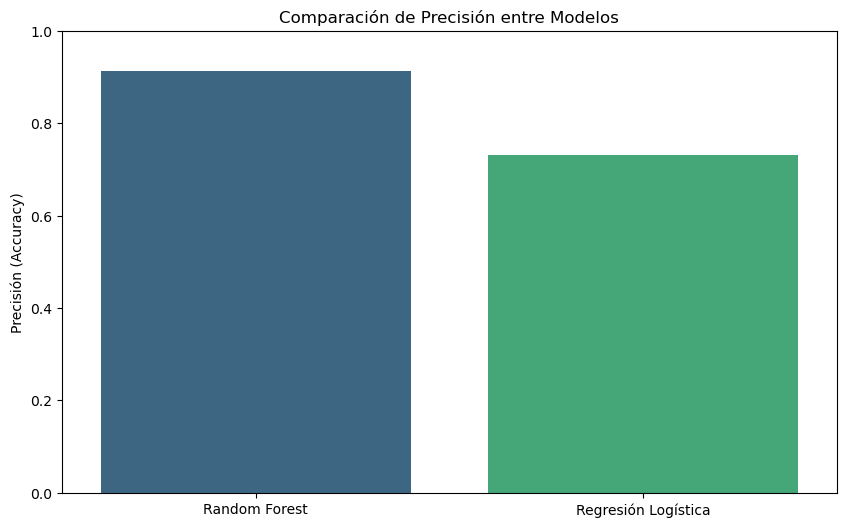

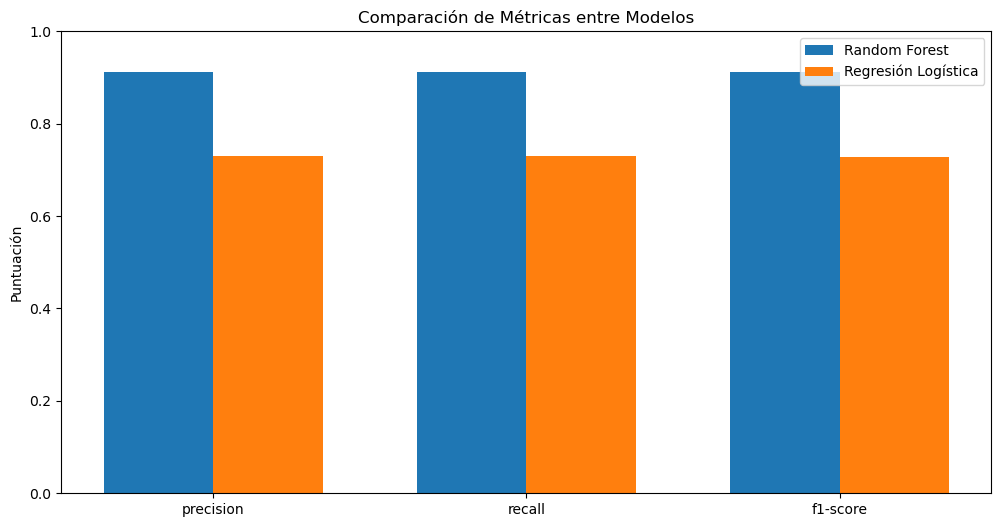

In [76]:
# Comparar rendimiento de ambos modelos
models = ['Random Forest', 'Regresión Logística']
accuracy = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Comparación de Precisión entre Modelos')
plt.ylim(0, 1)
plt.ylabel('Precisión (Accuracy)')
plt.show()

# Obtener informes de clasificación para ambos modelos
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)

# Extraer métricas clave
metrics = ['precision', 'recall', 'f1-score']
rf_metrics = [rf_report['weighted avg'][metric] for metric in metrics]
lr_metrics = [lr_report['weighted avg'][metric] for metric in metrics]

# Visualizar comparación
plt.figure(figsize=(12, 6))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, rf_metrics, width, label='Random Forest')
plt.bar(x + width/2, lr_metrics, width, label='Regresión Logística')

plt.xticks(x, metrics)
plt.ylabel('Puntuación')
plt.title('Comparación de Métricas entre Modelos')
plt.legend()
plt.ylim(0, 1)
plt.show()

# 10. Conclusiones y Análisis Final

In [83]:
# Crear un resumen de resultados
results = pd.DataFrame({
    'Modelo': models,
    'Accuracy': accuracy,
    'Precision': [rf_report['weighted avg']['precision'], lr_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], lr_report['weighted avg']['recall']],
    'F1-Score': [rf_report['weighted avg']['f1-score'], lr_report['weighted avg']['f1-score']]
})

print("\nResumen de resultados:")
print(results.to_string(index=False))

# Determinar el mejor modelo
best_model_idx = results['F1-Score'].argmax()
best_model_name = results.iloc[best_model_idx]['Modelo']
best_model = rf_best if best_model_name == 'Random Forest' else lr_best

print(f"\n🏆 El mejor modelo es {best_model_name} con un F1-Score de {results.iloc[best_model_idx]['F1-Score']:.4f}")

# Guardar el mejor modelo para uso futuro
joblib.dump(best_model, 'mejor_modelo_adaptabilidad.pkl')
print("El mejor modelo ha sido guardado como 'mejor_modelo_adaptabilidad.pkl'")

# 11. Aplicación Práctica: Predicción con Nuevos Datos
# ----------------------------------------------------------------

print("\n🧪 Ejemplo de predicción con nuevos datos...")

# Crear un ejemplo de nuevo estudiante
nuevo_estudiante = pd.DataFrame({
    'Gender': ['Boy'],
    'Age': ['16-20'],
    'Education Level': ['College'],
    'Institution Type': ['Government'],
    'IT Student': ['Yes'],
    'Location': ['Yes'],
    'Load-shedding': ['Low'],
    'Financial Condition': ['Mid'],
    'Internet Type': ['Wifi'],
    'Network Type': ['4G'],
    'Class Duration': ['3-6'],
    'Self Lms': ['Yes'],
    'Device': ['Mobile']
})

print("Datos del nuevo estudiante:")
print(nuevo_estudiante.to_string(index=False))

# Realizar predicción
prediccion = best_model.predict(nuevo_estudiante)
probabilidades = best_model.predict_proba(nuevo_estudiante)

print(f"\nPredicción del nivel de adaptabilidad: {prediccion[0]}")

# Si el modelo es multiclase, mostrar las probabilidades para cada clase
clases = best_model.classes_
print("\nProbabilidades por nivel:")
for i, clase in enumerate(clases):
    print(f"- {clase}: {probabilidades[0][i]:.2%}")



Resumen de resultados:
             Modelo  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.912863   0.912867 0.912863  0.912512
Regresión Logística  0.730290   0.730203 0.730290  0.727402

🏆 El mejor modelo es Random Forest con un F1-Score de 0.9125
El mejor modelo ha sido guardado como 'mejor_modelo_adaptabilidad.pkl'

🧪 Ejemplo de predicción con nuevos datos...
Datos del nuevo estudiante:
Gender   Age Education Level Institution Type IT Student Location Load-shedding Financial Condition Internet Type Network Type Class Duration Self Lms Device
   Boy 16-20         College       Government        Yes      Yes           Low                 Mid          Wifi           4G            3-6      Yes Mobile

Predicción del nivel de adaptabilidad: Moderate

Probabilidades por nivel:
- High: 0.50%
- Low: 31.50%
- Moderate: 68.00%


# 12. Interpretabilidad y Recomendaciones

In [87]:
# Basado en las características más importantes, ofrecer recomendaciones
top_features = feature_importance_df.head(5)['Feature'].tolist()

print(f"Basado en el análisis, estos son los 5 factores más importantes que influyen en la adaptabilidad:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}")

print("\nRecomendaciones generales:")
print("1. Enfocarse en mejorar el acceso a recursos tecnológicos adecuados")
print("2. Considerar la duración de las clases según el nivel educativo")
print("3. Implementar estrategias específicas según el género y edad de los estudiantes")
print("4. Adaptar los recursos educativos según el tipo de conexión a internet disponible")
print("5. Proporcionar apoyo adicional a estudiantes con condiciones financieras desfavorables")

print("\n✅ Análisis completado")

Basado en el análisis, estos son los 5 factores más importantes que influyen en la adaptabilidad:
1. Class Duration_0
2. Gender_Girl
3. Gender_Boy
4. Class Duration_1-3
5. Financial Condition_Mid

Recomendaciones generales:
1. Enfocarse en mejorar el acceso a recursos tecnológicos adecuados
2. Considerar la duración de las clases según el nivel educativo
3. Implementar estrategias específicas según el género y edad de los estudiantes
4. Adaptar los recursos educativos según el tipo de conexión a internet disponible
5. Proporcionar apoyo adicional a estudiantes con condiciones financieras desfavorables

✅ Análisis completado
